In [25]:
#cell 1
#Confirms main.py prints s1/s5 lines
MAIN = "/content/content/synth/main.py" #change only if path is different

with open(MAIN, "r", errors="ignore") as f:
    txt = f.read()
assert "s1:" in txt and "s5:" in txt, "Please apply the s1/s5 patch to main.py first."
print("Yes: main.py has s1/s5 in its progress print.")

Yes: main.py has s1/s5 in its progress print.


In [26]:
#cell 2
#paths
MAIN   = "/content/content/synth/main.py" #keep consistent
LOGDIR = "/content/run_logs_full" #full-run logs here

import os, pathlib, shlex, subprocess
pathlib.Path(LOGDIR).mkdir(parents=True, exist_ok=True)

def run_and_log(tag, **kw):
    """
    Runs main.py with given kwargs and writes stdout to LOGDIR/{tag}.log
    """
    cmd = ["python", MAIN]
    for k, v in kw.items():
        cmd += [f"--{k}", str(v)]
    print("RUN:", " ".join(shlex.quote(c) for c in cmd))
    out = subprocess.run(cmd, text=True, capture_output=True)
    print(out.stdout)
    open(f"{LOGDIR}/{tag}.log", "w").write(out.stdout)
    if out.stderr.strip():
        print("STDERR:\n", out.stderr)

In [27]:
#cell 3
#Learning rates
LR_GD   = "1e-3"
LR_ADAM = "1e-3"

#Iterations
LONG_ITERS_GD   = 100_000
LONG_ITERS_ADAM = 30_000

#Logging
LOG_EVERY_ADAM = 1000
LOG_EVERY_GD   = 20000 #800k / 20k = 40 points

#Shared synthetic configuration
BASE_SYN = dict(
    method="DLNN",
    data="gaussian", #noiseless synthetic (matrix completion)
    N=100,
    rank=5,
    reg_norm="ratio",
    initscale="1e-3",
    sample_size=2000,
    seed=67
)

In [28]:
'''#cell 4A - depth with penalty
#ADAM Fixed ONLY
#Depths {2,3,4,5} with fixed λ = 1e-4
for depth in (2, 3, 4, 5):
    run_and_log(f"SYN_adam_d{depth}_lam1e-4_fixed",
        **BASE_SYN, depth=depth, lam="1e-4",
        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)
'''
# Fig.3: Adam, depth=1, λ in {0, 1e-2}
for lam in ("0.0", "1e-2"):
    run_and_log(f"F3_adam_d1_lam{lam}",
        **BASE_SYN, depth=1, lam=lam,
        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)


RUN: python /content/content/synth/main.py --method DLNN --data gaussian --N 100 --rank 5 --reg_norm ratio --initscale 1e-3 --sample_size 2000 --seed 67 --depth 1 --lam 0.0 --optim Adam --lr 1e-3 --niters 30000 --log_interval 1000
depth: 1, iteration: 0, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 78.98138427734375, s1: 0.010862884111702442, s5: 0.00863040704280138
depth: 1, iteration: 1000, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 75.78550720214844, s1: 7.029204845428467, s5: 5.427803993225098
depth: 1, iteration: 2000, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 73.3804931640625, s1: 9.99821662902832, s5: 7.6709136962890625
depth: 1, iteration: 3000, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 71.83985137939453, s1: 11.364386558532715, s5: 8.634369850158691
depth: 1, iteration: 4000, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 70.96684265136719, s1: 12.0889854431

In [29]:
'''#cell 4B - depth with penalty
#ADAM (cosine only)
for depth in (1, 2, 3, 4, 5):
    run_and_log(f"SYN_adam_d{depth}_lam1e-4_cos",
        **BASE_SYN, depth=depth, lam="1e-4", lam_schedule="cosine",
        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)
    '''

'#cell 4B - depth with penalty\n#ADAM (cosine only)\nfor depth in (1, 2, 3, 4, 5):\n    run_and_log(f"SYN_adam_d{depth}_lam1e-4_cos",\n        **BASE_SYN, depth=depth, lam="1e-4", lam_schedule="cosine",\n        optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM, log_interval=LOG_EVERY_ADAM)\n    '

In [30]:
'''#cell 4C - depth with penalty
#GD Fixed ONLY
# Depths {3,4,5} with fixed λ = 1e-4
for depth in (3, 4, 5):
    run_and_log(f"SYN_gd_d{depth}_lam1e-4_fixed",
        **BASE_SYN, depth=depth, lam="1e-4",
        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)'''

# Fig.3: GD, depth=1, λ in {0, 1e-2}
for lam in ("0.0", "1e-2"):
    run_and_log(f"F3_gd_d1_lam{lam}",
        **BASE_SYN, depth=1, lam=lam,
        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)


RUN: python /content/content/synth/main.py --method DLNN --data gaussian --N 100 --rank 5 --reg_norm ratio --initscale 1e-3 --sample_size 2000 --seed 67 --depth 1 --lam 0.0 --optim GD --lr 1e-3 --niters 100000 --log_interval 20000
depth: 1, iteration: 0, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 80.73493957519531, s1: 0.0020139433909207582, s5: 0.0017653421964496374
depth: 1, iteration: 20000, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 70.32930755615234, s1: 0.25213250517845154, s5: 0.18596482276916504
depth: 1, iteration: 40000, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 70.32384490966797, s1: 0.4991978406906128, s5: 0.3682831823825836
depth: 1, iteration: 60000, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 70.322265625, s1: 0.7413725852966309, s5: 0.5469947457313538
depth: 1, iteration: 80000, test_MSE: 1.0109120607376099, test_RMSE: 1.0054412268937503, erank: 70.32156372070312, s1: 0.9

In [31]:
'''#cell 4D - depth with penalty #comment out depth 1
#GD (cosine only)
for depth in (2, 3, 4, 5):
    run_and_log(f"SYN_gd_d{depth}_lam1e-4_cos",
        **BASE_SYN, depth=depth, lam="1e-4", lam_schedule="cosine",
        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)
'''

'#cell 4D - depth with penalty #comment out depth 1\n#GD (cosine only)\nfor depth in (2, 3, 4, 5):\n    run_and_log(f"SYN_gd_d{depth}_lam1e-4_cos",\n        **BASE_SYN, depth=depth, lam="1e-4", lam_schedule="cosine",\n        optim="GD", lr=LR_GD, niters=LONG_ITERS_GD, log_interval=LOG_EVERY_GD)\n'

In [32]:
#cell 5
#Fetch ML-100k (safe no-op if present)
import os, urllib.request, zipfile, io, pathlib
ML_DIR = "/content/ml-100k"
if not os.path.exists(f"{ML_DIR}/u.data"):
    print("Downloading MovieLens 100k …")
    data = urllib.request.urlopen("https://files.grouplens.org/datasets/movielens/ml-100k.zip").read()
    zipfile.ZipFile(io.BytesIO(data)).extractall("/content")
    assert os.path.exists(f"{ML_DIR}/u.data"), "MovieLens 100k not found after download."
print("✔ MovieLens ready.")

BASE_ML = dict(
    method="DLNN",
    data="ml-100k-sample",
    depth=1,
    optim="Adam",
    lr="5e-4", #working LR
    trainprop="0.8",
    reg_norm="ratio",
    initscale="1e-3",
    log_interval=1000,
    seed=67
)

#λ = 0 vs 1e-3
'''run_and_log("ML_lam0_adam_long",    **BASE_ML, lam="0.0",  niters=40_000)
run_and_log("ML_lam1e-3_adam_long", **BASE_ML, lam="1e-3", niters=40_000)'''

✔ MovieLens ready.


'run_and_log("ML_lam0_adam_long",    **BASE_ML, lam="0.0",  niters=40_000)\nrun_and_log("ML_lam1e-3_adam_long", **BASE_ML, lam="1e-3", niters=40_000)'

In [33]:
'''#cell 6
# Only if you want to test λ schedule on ML-100k as well.
ML_CFG = dict(**BASE_ML)  # from your Cell 7

run_and_log("ML_lam1e-3_adam_fixed", **ML_CFG, lam="1e-3", niters=40_000)
run_and_log("ML_lam1e-3_adam_cos",   **ML_CFG, lam="1e-3", lam_schedule="cosine", niters=40_000)
'''

'#cell 6\n# Only if you want to test λ schedule on ML-100k as well.\nML_CFG = dict(**BASE_ML)  # from your Cell 7\n\nrun_and_log("ML_lam1e-3_adam_fixed", **ML_CFG, lam="1e-3", niters=40_000)\nrun_and_log("ML_lam1e-3_adam_cos",   **ML_CFG, lam="1e-3", lam_schedule="cosine", niters=40_000)\n'

In [34]:
#Cell 7 - Parse logs (also captures test_MSE)
import os, re, glob, pandas as pd, numpy as np

LOG_GLOBS = [os.path.join(LOGDIR, "*.log")]
files = sorted({p for g in LOG_GLOBS for p in glob.glob(g)})

pat = re.compile(
    r"depth:\s*(\d+).*?iteration:\s*(\d+).*?"
    r"test_MSE:\s*([\-0-9\.Ee\+]+).*?test_RMSE:\s*([\-0-9\.Ee\+]+).*?"
    r"erank:\s*([\-0-9\.Ee\+]+).*?s1:\s*([\-0-9\.Ee\+]+).*?s5:\s*([\-0-9\.Ee\+]+)"
)

def infer_opt(name):
    n = name.lower()
    if "adam" in n: return "adam"
    if "gd"   in n: return "gd"
    return "unk"

rows = []
for path in files:
    with open(path, "r", errors="ignore") as f:
        for line in f:
            m = pat.search(line)
            if not m:
                continue
            d,it,mse,rmse,er,s1,s5 = m.groups()
            rows.append(dict(
                file=os.path.basename(path),
                optimizer=infer_opt(path),
                depth=int(d),
                iteration=int(it),
                test_MSE=float(mse),
                test_RMSE=float(rmse),
                erank=float(er),
                s1=float(s1),
                s5=float(s5),
            ))

df = pd.DataFrame(rows).sort_values(["optimizer","depth","iteration"]).reset_index(drop=True)
print(f"Parsed {len(df)} rows from {len(files)} log files.")
if df.empty:
    raise RuntimeError("No rows parsed – make sure runs completed and main.py prints test_MSE/test_RMSE/s1/s5.")
df.tail(10)


Parsed 150 rows from 6 log files.


,file,optimizer,depth,iteration,test_MSE,test_RMSE,erank,s1,s5
140,SYN_gd_d4_lam1e-4_fixed.log,gd,4,600000,1.010979,1.005475,7.539696,0.096704,0.002923
141,SYN_gd_d4_lam1e-4_fixed.log,gd,4,620000,1.010989,1.005479,6.661159,0.111038,0.002965
142,SYN_gd_d4_lam1e-4_fixed.log,gd,4,640000,1.011000,1.005485,5.829357,0.129115,0.003012
143,SYN_gd_d4_lam1e-4_fixed.log,gd,4,660000,1.011013,1.005491,5.046763,0.152536,0.003065
144,SYN_gd_d4_lam1e-4_fixed.log,gd,4,680000,1.011028,1.005499,4.317347,0.183877,0.003124
145,SYN_gd_d4_lam1e-4_fixed.log,gd,4,700000,1.011047,1.005508,3.646162,0.227517,0.003189
146,SYN_gd_d4_lam1e-4_fixed.log,gd,4,720000,1.011070,1.005520,3.038748,0.291417,0.003261
147,SYN_gd_d4_lam1e-4_fixed.log,gd,4,740000,1.011094,1.005532,2.500895,0.391357,0.003339
148,SYN_gd_d4_lam1e-4_fixed.log,gd,4,760000,1.011115,1.005542,2.037903,0.562540,0.003425
149,SYN_gd_d4_lam1e-4_fixed.log,gd,4,780000,1.011103,1.005536,1.654338,0.897429,0.003517


In [35]:
#Cell 8 - Re-scan logs (captures test_MSE too)
import os, re, glob, pandas as pd, numpy as np

LOG_GLOBS = [os.path.join(LOGDIR, "*.log")]
files = sorted({p for g in LOG_GLOBS for p in glob.glob(g)})

pat = re.compile(
    r"depth:\s*(\d+).*?iteration:\s*(\d+).*?"
    r"test_MSE:\s*([\-0-9\.Ee\+]+).*?test_RMSE:\s*([\-0-9\.Ee\+]+).*?"
    r"erank:\s*([\-0-9\.Ee\+]+).*?s1:\s*([\-0-9\.Ee\+]+).*?s5:\s*([\-0-9\.Ee\+]+)"
)

def infer_opt(name):
    n = name.lower()
    if "adam" in n: return "adam"
    if "gd"   in n: return "gd"
    return "unk"

rows = []
for path in files:
    with open(path, "r", errors="ignore") as f:
        for line in f:
            m = pat.search(line)
            if not m:
                continue
            d,it,mse,rmse,er,s1,s5 = m.groups()
            rows.append(dict(
                file=os.path.basename(path),
                fullpath=path,
                optimizer=infer_opt(path),
                depth=int(d),
                iteration=int(it),
                test_MSE=float(mse),
                test_RMSE=float(rmse),
                erank=float(er),
                s1=float(s1),
                s5=float(s5),
            ))

df = pd.DataFrame(rows).sort_values(["file","iteration"]).reset_index(drop=True)
print(f"Parsed {len(df)} rows from {len(files)} log files.")
if df.empty:
    raise RuntimeError("No rows parsed - ensure runs completed and logs contain test_MSE/test_RMSE/s1/s5.")
df.tail(10)


Parsed 150 rows from 6 log files.


,file,fullpath,optimizer,depth,iteration,test_MSE,test_RMSE,erank,s1,s5
140,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,600000,1.010979,1.005475,7.539696,0.096704,0.002923
141,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,620000,1.010989,1.005479,6.661159,0.111038,0.002965
142,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,640000,1.011000,1.005485,5.829357,0.129115,0.003012
143,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,660000,1.011013,1.005491,5.046763,0.152536,0.003065
144,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,680000,1.011028,1.005499,4.317347,0.183877,0.003124
145,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,700000,1.011047,1.005508,3.646162,0.227517,0.003189
146,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,720000,1.011070,1.005520,3.038748,0.291417,0.003261
147,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,740000,1.011094,1.005532,2.500895,0.391357,0.003339
148,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,760000,1.011115,1.005542,2.037903,0.562540,0.003425
149,SYN_gd_d4_lam1e-4_fixed.log,/content/run_logs_full/SYN_gd_d4_lam1e-4_fixed...,gd,4,780000,1.011103,1.005536,1.654338,0.897429,0.003517


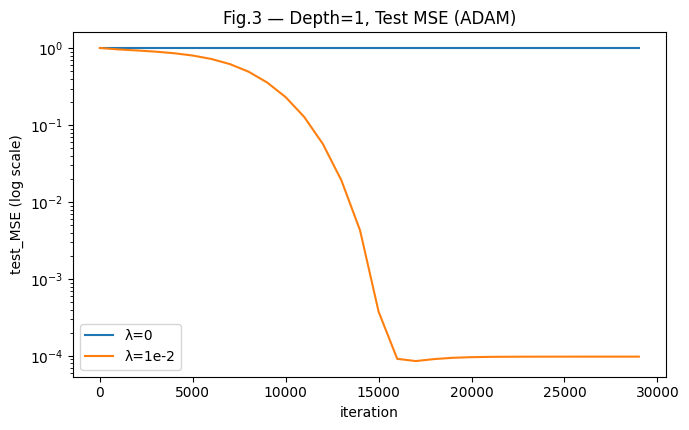

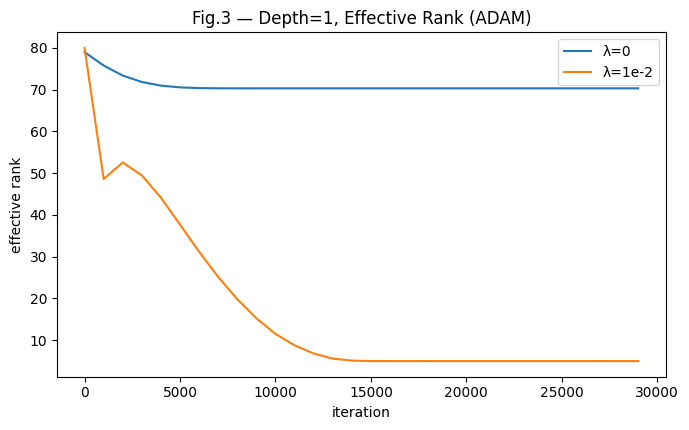

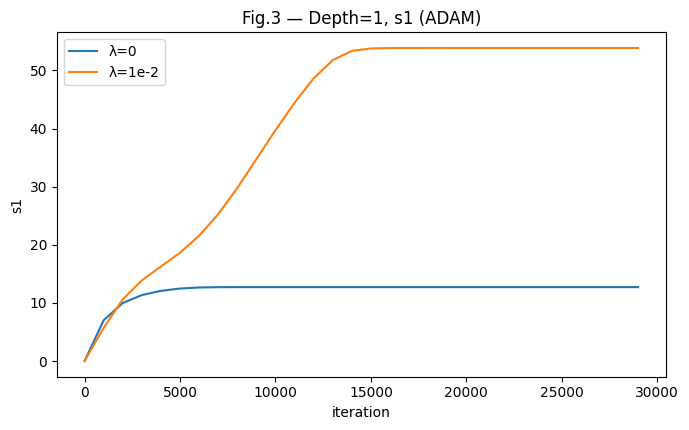

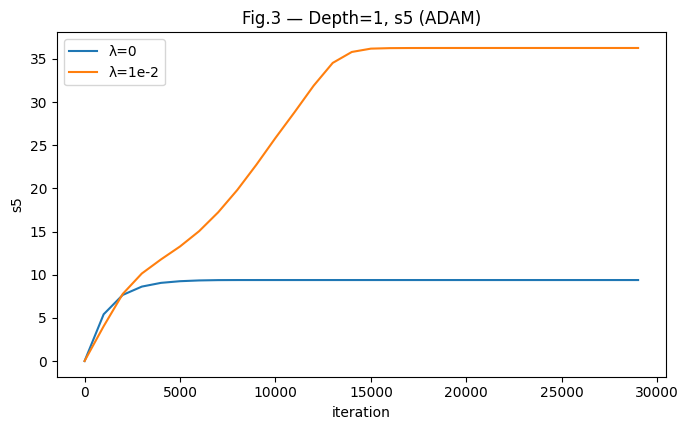

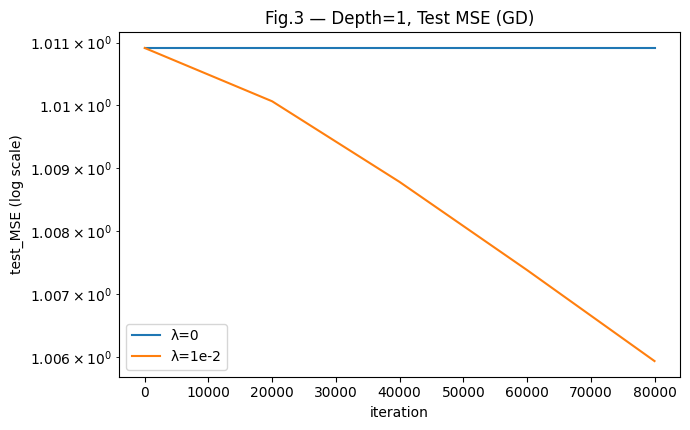

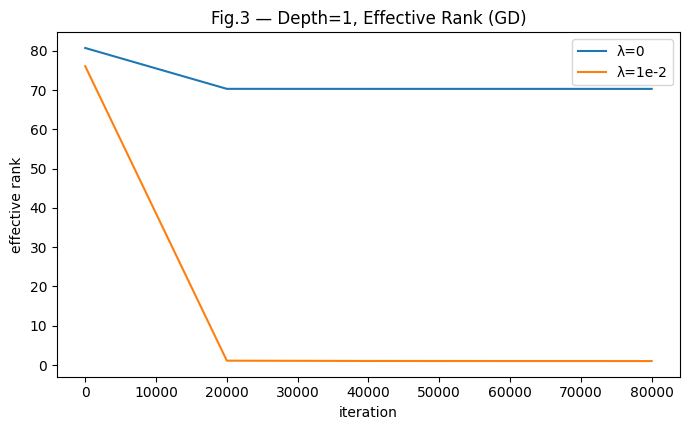

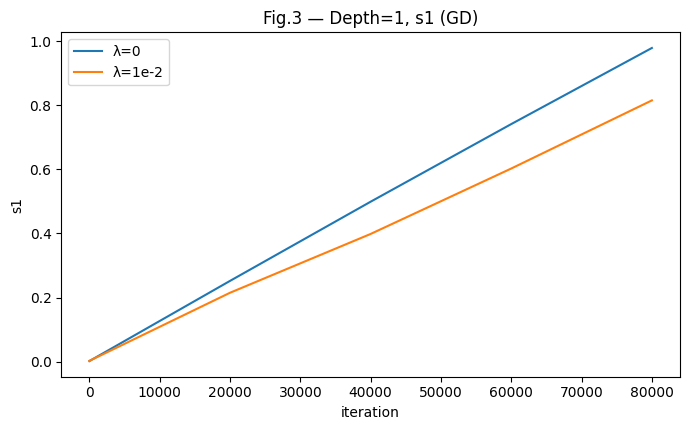

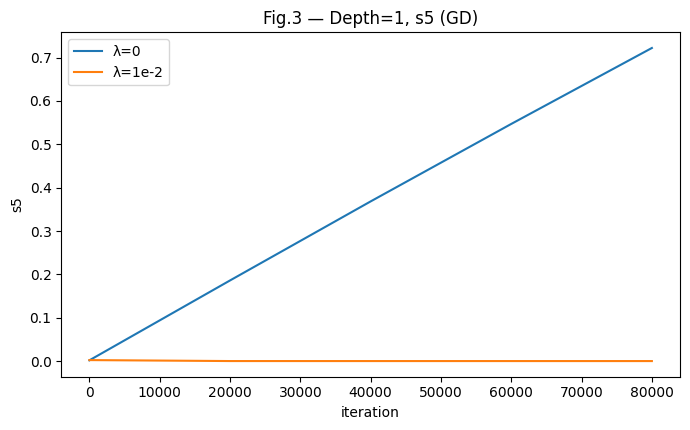

In [46]:
# Cell 9 - Fig.3 (depth=1): λ ∈ {0, 1e−2}; per-optimizer plots for MSE, erank, s1, s5
import re
import numpy as np
import matplotlib.pyplot as plt

pat = r"^F3_(adam|gd)_d1_lam([0-9eE\.\-\+]+)(?:\.log)?$"

sub = (
    df[(df["depth"] == 1) & (df["file"].str.match(pat, na=False))]
      .copy()
      .sort_values(["file","iteration"])
)

if sub.empty:
    print("[Fig.3] No rows found for depth=1 F3_* runs. "
          "Expected files like F3_adam_d1_lam0.0.log and F3_gd_d1_lam1e-2.log")
else:
    #Extract optimizer and lambda from filename
    parsed = sub["file"].str.extract(pat)
    sub["opt2"]    = parsed[0].str.lower() #adam or gd
    sub["lam_str"] = parsed[1]

    def lam_label(s: str) -> str:
        s = s.strip()
        return "0" if s in ("0", "0.0", "0.00") else s.replace("e-0", "e-")  # tidy label
    sub["lam_lbl"] = sub["lam_str"].map(lam_label)

    def _finite_xy(g, ycol):
        g = g.sort_values("iteration")
        x = g["iteration"].to_numpy()
        y = g[ycol].to_numpy()
        mask = np.isfinite(y)
        return x[mask], y[mask]

    def plot_one_optimizer(opt_name: str):
        gopt = sub[sub["opt2"] == opt_name].copy()
        if gopt.empty:
            print(f"[Fig.3] No rows for optimizer: {opt_name.upper()}")
            return

        #Test MSE (log-y) ---
        plt.figure(figsize=(7.0, 4.4))
        for lam, g in gopt.groupby("lam_lbl"):
            x, y = _finite_xy(g, "test_MSE")
            y = np.maximum(y, 1e-12)
            plt.semilogy(x, y, label=f"λ={lam}")
        plt.title(f"Fig.3 - Depth=1, Test MSE ({opt_name.upper()})")
        plt.xlabel("iteration"); plt.ylabel("test_MSE (log scale)")
        plt.legend(); plt.tight_layout(); plt.show()

        #Effective rank
        plt.figure(figsize=(7.0, 4.4))
        for lam, g in gopt.groupby("lam_lbl"):
            x, y = _finite_xy(g, "erank")
            plt.plot(x, y, label=f"λ={lam}")
        plt.title(f"Fig.3 - Depth=1, Effective Rank ({opt_name.upper()})")
        plt.xlabel("iteration"); plt.ylabel("effective rank")
        plt.legend(); plt.tight_layout(); plt.show()

        #s1 (top singular value) ---
        plt.figure(figsize=(7.0, 4.4))
        for lam, g in gopt.groupby("lam_lbl"):
            x, y = _finite_xy(g, "s1")
            plt.plot(x, y, label=f"λ={lam}")
        plt.title(f"Fig.3 - Depth=1, s1 ({opt_name.upper()})")
        plt.xlabel("iteration"); plt.ylabel("s1")
        plt.legend(); plt.tight_layout(); plt.show()

        #s5 (5th singular value) ---
        plt.figure(figsize=(7.0, 4.4))
        for lam, g in gopt.groupby("lam_lbl"):
            x, y = _finite_xy(g, "s5")
            if len(x) == 0:
                continue  #all NaNs (e.g., early iterations)
            plt.plot(x, y, label=f"λ={lam}")
        plt.title(f"Fig.3 - Depth=1, s5 ({opt_name.upper()})")
        plt.xlabel("iteration"); plt.ylabel("s5")
        plt.legend(); plt.tight_layout(); plt.show()

    #Make the eight plots: Adam (4) then GD (4)
    plot_one_optimizer("adam")
    plot_one_optimizer("gd")


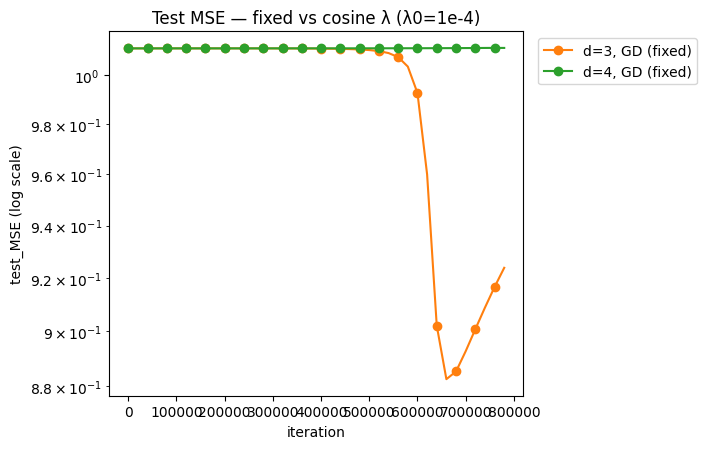

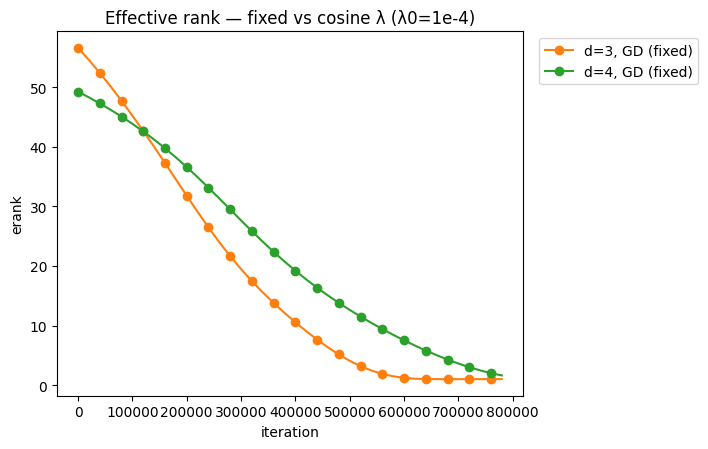

In [37]:
#Cell 10 - depths={2,3,4,5}: fixed vs cosine; semilogy(MSE) + erank
import matplotlib.pyplot as plt
import numpy as np

def _sched_from_name(name: str) -> str:
    return "cos" if "cos" in name.lower() else "fixed"

def plot_fixed_vs_cos_mse_erank(df, depths=(2,3,4,5)):
    sub = df[(df["file"].str.contains("lam1e-4", na=False)) &
             (df["depth"].isin(depths))]\
            .sort_values(["file","iteration"])
    if sub.empty:
        print("[multi-depth] No rows for λ=1e-4.")
        return

    depth_colors = {d: f"C{i}" for i, d in enumerate(sorted(set(depths)))}
    opt_marker   = {"adam":"", "gd":"o", "unk":"x"} #markers distinguish optimizers

    #Test MSE (log-y)
    plt.figure(figsize=(7.2, 4.6))
    for (d, opt, sched), g in sub.groupby(["depth","optimizer", sub["file"].map(_sched_from_name)]):
        ls = "-" if sched == "fixed" else "--"
        g = g.sort_values("iteration")
        y = np.maximum(g["test_MSE"].to_numpy(), 1e-12)
        plt.semilogy(g["iteration"], y,
                     linestyle=ls, color=depth_colors[d],
                     marker=opt_marker.get(opt,""),
                     markevery=max(len(g)//20, 1),
                     label=f"d={d}, {opt.upper()} ({sched})")
    plt.title("Test MSE - fixed vs cosine λ (λ0=1e-4)")
    plt.xlabel("iteration"); plt.ylabel("test_MSE (log scale)")
    plt.legend(loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

    #Effective rank (linear)
    plt.figure(figsize=(7.2, 4.6))
    for (d, opt, sched), g in sub.groupby(["depth","optimizer", sub["file"].map(_sched_from_name)]):
        ls = "-" if sched == "fixed" else "--"
        g = g.sort_values("iteration")
        plt.plot(g["iteration"], g["erank"],
                 linestyle=ls, color=depth_colors[d],
                 marker=opt_marker.get(opt,""),
                 markevery=max(len(g)//20, 1),
                 label=f"d={d}, {opt.upper()} ({sched})")
    plt.title("Effective rank - fixed vs cosine λ (λ0=1e-4)")
    plt.xlabel("iteration"); plt.ylabel("erank")
    plt.legend(loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

plot_fixed_vs_cos_mse_erank(df, depths=(2,3,4,5))


[SV depth=1] No rows for λ=1e-4.


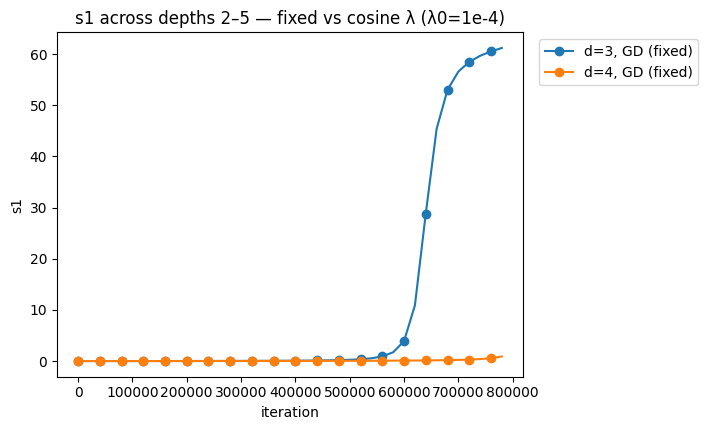

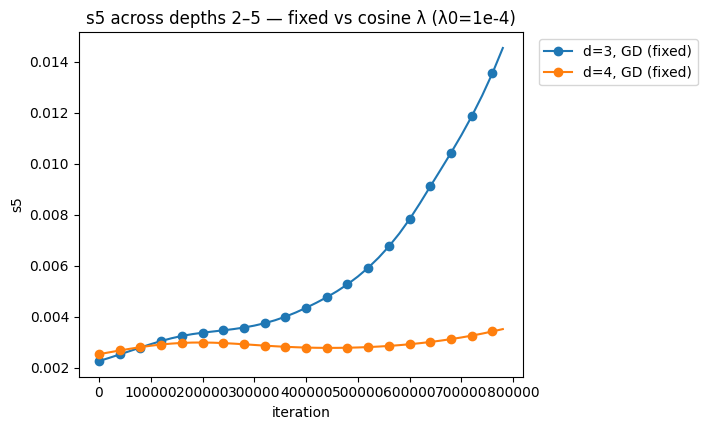

In [44]:
#cell 10.5
# Cell - Singular values (s1, s5)

import matplotlib.pyplot as plt

def _sched_from_name(name: str) -> str:
    return "cos" if "cos" in name.lower() else "fixed"

#(A) depth=1
sub1 = df[(df["depth"] == 1) & (df["file"].str.contains("lam1e-4", na=False))]\
       .sort_values(["file","iteration"])
if sub1.empty:
    print("[SV depth=1] No rows for λ=1e-4.")
else:
    opt_marker = {"adam":"", "gd":"o", "unk":"x"}

    #s1
    plt.figure(figsize=(6.8, 4.2))
    for (opt, sched), g in sub1.groupby([sub1["optimizer"], sub1["file"].map(_sched_from_name)]):
        ls = "-" if sched == "fixed" else "--"
        g = g.sort_values("iteration")
        plt.plot(g["iteration"], g["s1"], linestyle=ls, marker=opt_marker.get(opt,""),
                 markevery=max(len(g)//20,1), label=f"{opt.upper()} ({sched})")
    plt.title("Depth=1 - top singular value s1 (fixed vs cosine λ)")
    plt.xlabel("iteration"); plt.ylabel("s1")
    plt.legend(); plt.tight_layout(); plt.show()

    #s5
    plt.figure(figsize=(6.8, 4.2))
    for (opt, sched), g in sub1.groupby([sub1["optimizer"], sub1["file"].map(_sched_from_name)]):
        ls = "-" if sched == "fixed" else "--"
        g = g.sort_values("iteration")
        plt.plot(g["iteration"], g["s5"], linestyle=ls, marker=opt_marker.get(opt,""),
                 markevery=max(len(g)//20,1), label=f"{opt.upper()} ({sched})")
    plt.title("Depth=1 - 5th singular value s5 (fixed vs cosine λ)")
    plt.xlabel("iteration"); plt.ylabel("s5")
    plt.legend(); plt.tight_layout(); plt.show()

#(B) depths 2–5
subD = df[(df["depth"].isin([2,3,4,5])) & (df["file"].str.contains("lam1e-4", na=False))]\
       .sort_values(["file","iteration"])
if subD.empty:
    print("[SV depths 2–5] No rows for λ=1e-4.")
else:
    depth_colors = {d: f"C{i}" for i, d in enumerate(sorted(subD["depth"].unique()))}
    opt_marker   = {"adam":"", "gd":"o", "unk":"x"}

    #s1
    plt.figure(figsize=(7.2, 4.4))
    for (d, opt, sched), g in subD.groupby(["depth","optimizer", subD["file"].map(_sched_from_name)]):
        ls = "-" if sched == "fixed" else "--"
        g = g.sort_values("iteration")
        plt.plot(g["iteration"], g["s1"], linestyle=ls, color=depth_colors[d],
                 marker=opt_marker.get(opt,""), markevery=max(len(g)//20,1),
                 label=f"d={d}, {opt.upper()} ({sched})")
    plt.title("s1 across depths 2–5 - fixed vs cosine λ (λ0=1e-4)")
    plt.xlabel("iteration"); plt.ylabel("s1")
    plt.legend(loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()

    #s5
    plt.figure(figsize=(7.2, 4.4))
    for (d, opt, sched), g in subD.groupby(["depth","optimizer", subD["file"].map(_sched_from_name)]):
        ls = "-" if sched == "fixed" else "--"
        g = g.sort_values("iteration")
        plt.plot(g["iteration"], g["s5"], linestyle=ls, color=depth_colors[d],
                 marker=opt_marker.get(opt,""), markevery=max(len(g)//20,1),
                 label=f"d={d}, {opt.upper()} ({sched})")
    plt.title("s5 across depths 2–5 - fixed vs cosine λ (λ0=1e-4)")
    plt.xlabel("iteration"); plt.ylabel("s5")
    plt.legend(loc="upper left", bbox_to_anchor=(1.02,1.0))
    plt.tight_layout(); plt.show()


In [48]:
#cell 11
#Compute time-to-erank ≤ r* + ε and min test_RMSE
TARGET_R = 5.0 #synthetic true rank
EPS      = 0.5 #tolerance; tweak if needed

def time_to_rank(group, target=TARGET_R, eps=EPS):
    g = group.sort_values("iteration")
    hit = g[g["erank"] <= (target + eps)]
    return int(hit["iteration"].iloc[0]) if not hit.empty else None

def best_rmse(group):
    return float(group["test_RMSE"].min())

summary_rows = []
for depth in (1, 2, 3, 4, 5):
    subset = df[(df.depth==depth) & df.file.str.contains("SYN_adam_d", na=False)]
    if subset.empty:
        continue
    for key, g in subset.groupby("file"):
        sched = "cosine" if "cos" in key.lower() else "fixed"
        t_hit = time_to_rank(g)
        rmin  = best_rmse(g)
        summary_rows.append(dict(depth=depth, schedule=sched, time_to_rank=t_hit, best_test_RMSE=rmin, file=key))

summary = pd.DataFrame(summary_rows).sort_values(["depth","schedule"])
print("=== Time-to-rank and Best RMSE (Synthetic, Adam) ===")
print(summary[["depth","schedule","time_to_rank","best_test_RMSE","file"]].to_string(index=False))

#Quick winner verdict per depth
print("\n=== Verdict per depth ===")
for depth, g in summary.groupby("depth"):
    g = g.copy()
    #Prefer lower time_to_rank; tie-break by best RMSE
    def score(row):
        #None (no hit) ranks worse than any integer
        t = row["time_to_rank"]
        t = 10**12 if t is None else t
        return (t, row["best_test_RMSE"])
    winner = g.loc[g.apply(score, axis=1).idxmin()]
    print(f"depth={depth}: WINNER → {winner['schedule']} (time_to_rank={winner['time_to_rank']}, best_RMSE={winner['best_test_RMSE']:.6f})")


KeyError: 'depth'

In [ ]:
'''#cell 12
ml = df[df["file"].str.contains("ML_", na=False)]
assert not ml.empty, "No MovieLens rows parsed. Run Cell 6 first."

#Extract λ from filename for labeling
def lab(name):
    return "λ=1e-3" if "lam1e-3" in name else "λ=0"

def plot_ml(metric, title):
    plt.figure(figsize=(6.6,4.4))
    for key, g in ml.groupby("file"):
        g = g.sort_values("iteration")
        plt.plot(g["iteration"], g[metric], "--", label=f"Adam d=1, {lab(key)}")
    plt.xlabel("iteration"); plt.ylabel(metric); plt.title(title)
    plt.legend(); plt.tight_layout(); plt.show()

plot_ml("test_RMSE", "MovieLens: test_RMSE")
plot_ml("erank",     "MovieLens: erank")

#summary table
last = (ml.sort_values(["file","iteration"])
          .groupby("file").tail(1)
          [["file","iteration","test_RMSE","erank","s1","s5"]])
print("=== MovieLens last metrics ===")
print(last.to_string(index=False))'''

In [ ]:
#cell 13
last_syn = (df[~df["file"].str.contains("ML_", na=False)]
              .sort_values(["optimizer","depth","iteration"])
              .groupby(["optimizer","depth"]).tail(1)
              [["optimizer","depth","iteration","test_RMSE","erank","s1","s5"]])
print("=== Last metrics (synthetic, per optimizer & depth) ===")
print(last_syn.to_string(index=False))

In [ ]:
#cell 14
#Hypothesis scoreboard for Adam & GD (depth 1-5; λ=1e-4)
import pandas as pd

def time_to_rank(g, r_star=5.0, eps=0.5):
    hit = g[g["erank"] <= (r_star + eps)].sort_values("iteration")
    return int(hit["iteration"].iloc[0]) if not hit.empty else None

rows = []
for opt in ("adam","gd"):
    for depth in (1, 2, 3, 4, 5):
        for tag, label in (("fixed","fixed"), ("cos","cosine")):
            sub = df[(df.optimizer==opt) &
                     (df.depth==depth) &
                     (df.file.str.contains(f"lam1e-4_{tag}", na=False))]\
                  .sort_values(["file","iteration"])
            if sub.empty: continue
            rows.append(dict(
                optimizer=opt,
                depth=depth,
                schedule=label,
                time_to_rank=time_to_rank(sub, r_star=5.0, eps=0.5),
                best_test_RMSE=sub["test_RMSE"].min(),
                file=sub["file"].iloc[0]
            ))

res = pd.DataFrame(rows).sort_values(["optimizer","depth","schedule"])
print("=== Time-to-rank and Best RMSE (Synthetic, λ=1e-4) ===")
print(res.to_string(index=False))

print("\n=== Verdict per (optimizer, depth) ===")
for (opt, d), g in res.groupby(["optimizer","depth"]):
    g2 = g.copy(); g2["time_to_rank"] = g2["time_to_rank"].fillna(1e12)
    win = g2.sort_values(["time_to_rank","best_test_RMSE"]).iloc[0]
    print(f"{opt.upper()}, d={d}: WINNER → {win['schedule']} "
          f"(time_to_rank={win['time_to_rank']}, best_RMSE={win['best_test_RMSE']:.6f})")
